In [1]:
import tensorflow as tf     # 학습 알고리즘을 위해 텐서플로우를 불러옵니다
import numpy as np # 데이터 초기화를 위해 NumPy를 불러옵니다  
import matplotlib.pyplot as plt # 데이터의 시각화를 위해 matplotlib을 불러옵니다

In [3]:
learning_rate = 0.01 # 학습 알고리즘에 의해 사용될 상수들을 정의합니다. 이들을 하이퍼파라미터 (hyperparameter) 라고 합니다
training_epochs = 100

x_train = np.linspace(-1, 1, 101) # 최적의 선을 찾아내기 위해 가짜 데이터를 생성해 줍니다
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32) # 입력 노드와 출력 노드를 플레이스홀더로 설정함으로써, 실제로 값은 x_train 과 y_train 에 의해 입력받도록 합니다
Y = tf.placeholder(tf.float32)

def model(X, w): # 모델을 y = w*X로 정의합니다
    return tf.multiply(X, w)

w = tf.Variable(0.0, name="weights") # 가중치 변수를 설정합니다

y_model = model(X, w) # 비용 함수를 정의합니다
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 학습 알고리즘이 반복될때마다 호출될 연산을 정의합니다

In [4]:
sess = tf.Session() # 세션을 설정하고 모든 변수를 초기화합니다
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs): # 데이터셋을 여러번 반복해서 통과합니다
  for (x, y) in zip(x_train, y_train): # 데이터셋 내의 각 아이템을 반복해서 통과합니다
    sess.run(train_op, feed_dict={X: x, Y: y}) # 비용 함수를 최소화하기 위해 모델 파라미터를 업데이트합니다

w_val = sess.run(w) # 최종 파라미터 값을 얻어냅니다

sess.close() # 세션을 닫습니다

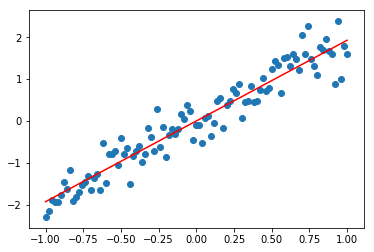

In [5]:
plt.scatter(x_train, y_train) # 원래의 데이터를 그려줍니다
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r') # 최적의 선을 그려줍니다
plt.show()